In [220]:
#--- load required packages
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from scipy.io import loadmat

#--- for reproducability
random_state = 0

#--- load data
ing_mat = loadmat('MATLAB/ingredients.mat')['ingredients']
cityDist_mat = loadmat('MATLAB/citiesDistMat.mat')['citiesDistMat']
labelName_mat = loadmat('MATLAB/labelNames.mat')['labelNames']
labels_mat = loadmat('MATLAB/labels.mat')['labels']
recipe_mat = loadmat('MATLAB/recipes.mat')['recipes']

#--- for colnames
ing_headline = []
for i in ing_mat[0]:
    ing_headline.append(i[0])
#--- create data matrices
dataset_X = pd.DataFrame(recipe_mat,columns=ing_headline) #predictors
dataset_y = pd.DataFrame(labels_mat,columns=['label']) #labels
X_train_full,X_test,y_train_full,y_test = train_test_split(dataset_X,dataset_y,
                                                            test_size=0.2,
                                                            random_state = random_state) #train test split
X_train,X_val,y_train,y_val = train_test_split(X_train_full,y_train_full,
                                                test_size=0.25,
                                                random_state = random_state) #train val split
X_train_len = len(X_train)

#--- additionally have cuisines as list
cuisines = []
for n in range(0, 12, 1):
    idx = dataset_y.index[dataset_y.label == n+1]
    cuisines.append(labelName_mat[idx[0]][0].item())

In [5]:
"""
    There are 709 ingredients which are used in 12 different cuisines 
    for 4236 recipes.  
    * label_mat: Number indicating the cuisine a recipe belongs to
    * labelName_mat: same as above just with names instead of numbers
    * recipe_mat: indicates which ingredients were used for a particular recipe
    * cityDist_mat: how far countries are away from each other distance-wise
"""

'\n    There are 709 ingredients which are used in 12 different cuisines \n    for 4236 recipes.  \n    * label_mat: Number indicating the cuisine a recipe belongs to\n    * labelName_mat: same as above just with names instead of numbers\n    * recipe_mat: indicates which ingredients were used for a particular recipe\n    * cityDist_mat: how far countries are away from each other distance-wise\n'

In [171]:
#--- how to get index of rows corresponding to one cuisine
dataset_y.index[dataset_y.label == 1]

# using this quite often, could have just created a list
# with the correspinding indices, will leave it like it is for now

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            343, 344, 345, 346, 347, 348, 349, 350, 351, 352],
           dtype='int64', length=353)

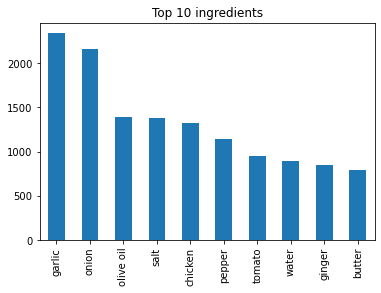

In [172]:
#--- top 10 most used ingredients
fig, ax = plt.subplots()
# sum up occurences of each ingredient
freq_ing = dataset_X.sum()
# filter for the 10 most frequent
most_freq_ing = freq_ing.nlargest(10)
ax.set_title("Top 10 ingredients")
most_freq_ing.plot.bar()

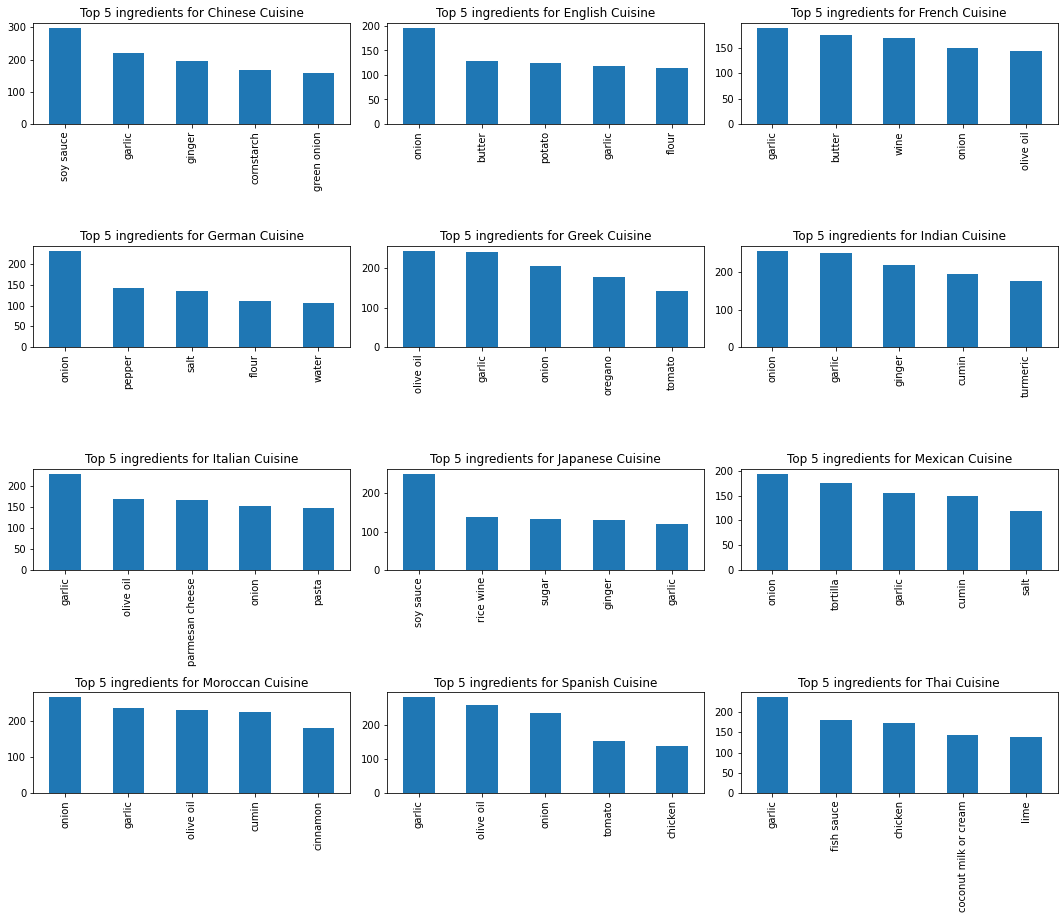

In [173]:
#--- top 3 ingredient per cuisine
#--- could still change colors, like same color for same ingredients
n_ing = 5

fig, axes = plt.subplots(4,3, figsize=(15,12))
n = 0
for i in range(0,4,1):
    for j in range(0,3,1):
        idx = dataset_y.index[dataset_y.label == n+1]
        freq_ing_cuis = dataset_X.iloc[idx].sum()
        most_freq_ing_cuis = freq_ing_cuis.nlargest(n_ing)
        fig.tight_layout()
        most_freq_ing_cuis.plot.bar(title = "Top {} ingredients for {} Cuisine".format(n_ing, labelName_mat[idx[0]][0].item()), 
                                    ax=axes[i,j])
        n+=1
        

In [174]:
#--- number of ingredients that each cuisine makes use of (in total)
used_ing = []
for n in range(0, 12, 1):
    idx = dataset_y.index[dataset_y.label == n+1]
    freq_ing_cuis = dataset_X.iloc[idx].sum()
    used_idx = freq_ing_cuis.index[freq_ing_cuis != 0]
    used_ing.append(len(used_idx))

data_ing = pd.DataFrame(data = {"Cuisine": cuisines, 
                    "#Used ingredients": used_ing})

data_ing.sort_values(by="#Used ingredients", ascending=False)


,Cuisine,#Used ingredients
1,English,317
2,French,292
7,Japanese,286
10,Spanish,277
3,German,263
4,Greek,260
11,Thai,260
9,Moroccan,254
8,Mexican,250
6,Italian,249


In [175]:
#--- Average number of ingredients for each cuisine per recipe
av_num_ing = []
for i in range(0, 12, 1):
    idx = dataset_y.index[dataset_y.label == i+1]
    # row-wise sum of ingredients
    sum_ing = dataset_X.iloc[idx].sum(axis=1)
    av_num_ing.append(sum_ing.mean())

data_av_ing = pd.DataFrame(data = {"Cuisine": cuisines, 
                    "Average no. of ingredients": av_num_ing})

data_av_ing.sort_values(by="Average no. of ingredients", ascending=False)

,Cuisine,Average no. of ingredients
9,Moroccan,13.189802
5,Indian,12.832861
11,Thai,11.674221
0,Chinese,11.413598
10,Spanish,11.263456
4,Greek,10.773371
2,French,10.495751
6,Italian,10.373938
8,Mexican,10.232295
3,German,9.532578


In [11]:
#--- too big correlation matrix
#dataset_X.corr()
#sns.pairplot(dataset_X)

In [176]:
#--- from https://stackoverflow.com/questions/17778394/list-highest-correlation-pairs-from-a-large-correlation-matrix-in-pandas

def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop
    

def get_top_abs_correlations(df, n=10):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(dataset_X))

Top Absolute Correlations
cheshire cheese          english muffin    1.000000
sazon goya               sofrito sauce     0.816400
almond butter            coconut oil       0.707023
burdock root             kamaboko          0.707023
french style green bean  gumbo             0.707023
Chinese mushroom         sea cucumber      0.707023
coconut milk or cream    curry paste       0.580458
coriander root           satay             0.577214
rutabaga                 yams              0.577214
muscovado sugar          passata           0.577214
dtype: float64


In [177]:
#--- how many recipes of each cuisine?
num_recipes_cuis = []

for i in range(0, 12, 1):
    #print(dataset_y[dataset_y.label == i+1])
    num_recipes_cuis.append(len(dataset_y[dataset_y.label == i+1]))

#--- everything looking good, nicely balanced data set:  
print("Balance in complete data set") 
print(num_recipes_cuis)

#--- no weird labels either (outside of 1-12):
dataset_y.label.isin(range(1, 13, 1)).all()

#--- balance in training set not perfect anymore but sufficiently good
num_recipes_cuis = []

for i in range(0, 12, 1):
    #print(dataset_y[dataset_y.label == i+1])
    num_recipes_cuis.append(len(y_train[y_train.label == i+1]))

print("Balance in training data")  
print(num_recipes_cuis)


Balance in complete data set
[353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353, 353]
Balance in training data
[207, 209, 219, 208, 213, 203, 215, 212, 206, 221, 220, 208]


REPEAT ABOVE

Repeating most of the above but only using training set (and validation set?)

Just as a reminder, in our complete data we have 4236 recipes.

The way we splitted the recipes gives us 

        * 2541 == 60% training data
        
        * 847 == 20% validation data

        * 848 == 20% test data


,Cuisine,#Used ingredients
1,English,267
2,French,246
7,Japanese,233
11,Thai,231
10,Spanish,230
9,Moroccan,226
6,Italian,213
3,German,212
4,Greek,209
8,Mexican,207


,Cuisine,Average no. of ingredients
9,Moroccan,13.149321
5,Indian,12.714286
11,Thai,11.682692
10,Spanish,11.404545
0,Chinese,11.323671
4,Greek,10.892019
6,Italian,10.451163
2,French,10.360731
8,Mexican,10.004854
3,German,9.543269


Top Absolute Correlations
sole                     truffle          1.000000
french style green bean  gumbo            1.000000
muscovado sugar          passata          1.000000
amchoor powder           bitter melon     1.000000
pastry dough             smoked salmon    0.706968
chayote                  cracker          0.706968
Chinese mushroom         sea cucumber     0.706968
sazon goya               sofrito sauce    0.706968
chervil                  hake fillets     0.706968
guacamole                sofrito sauce    0.706968
dtype: float64


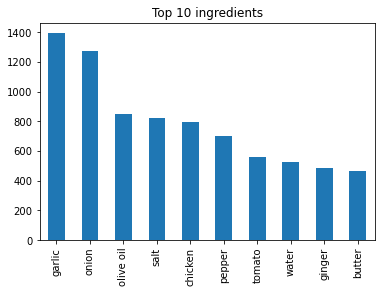

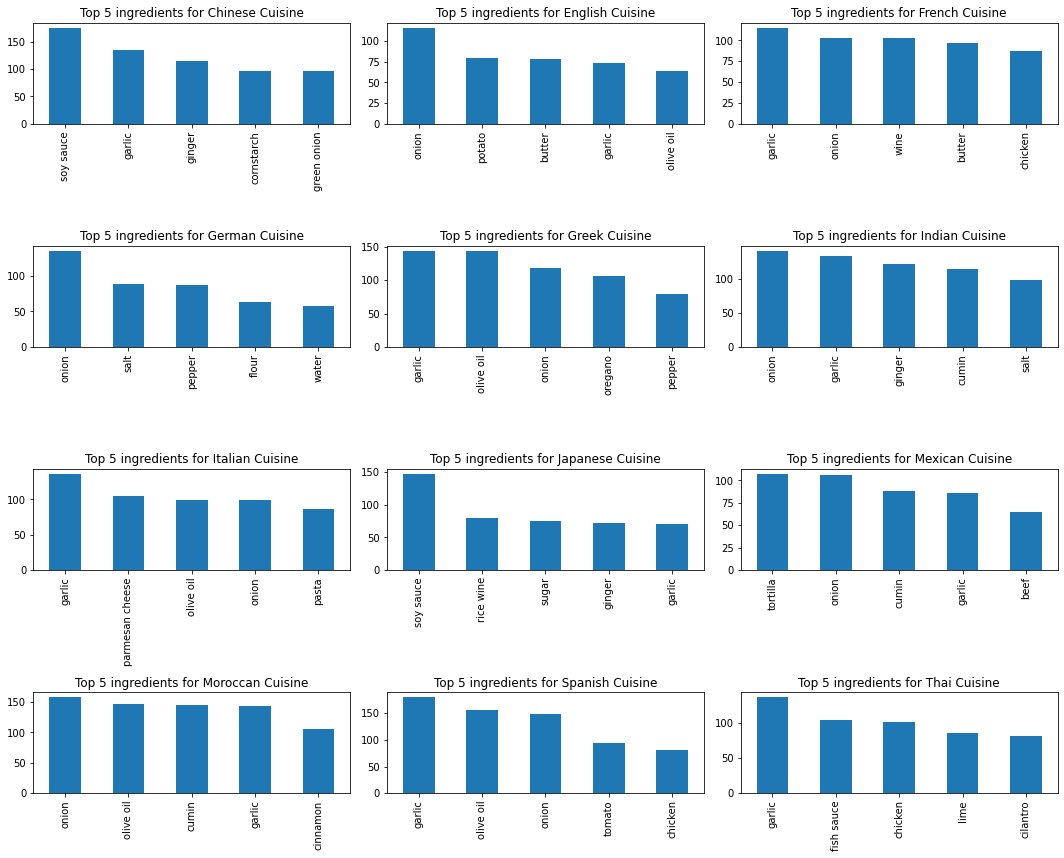

In [205]:
#----- PLOTS -------

#--- top 10 most used ingredients
fig, ax = plt.subplots()
# sum up occurences of each ingredient
freq_ing = X_train.sum()
# filter for the 10 most frequent
most_freq_ing = freq_ing.nlargest(10)
ax.set_title("Top 10 ingredients")
most_freq_ing.plot.bar()

#--- IMPORTANT, training set comes with original index
#--- need to add new columns with indices from 0-2541
#--- do this on a copy of y_train
helper_y_train = y_train.copy(deep=True)
helper_y_train.insert(1, "Position", np.arange(0, len(helper_y_train)), True)

#--- top 3 ingredient per cuisine
# could still change colors, like same color for same ingredients
n_ing = 5

fig, axes = plt.subplots(4,3, figsize=(15,12))
n = 0
for i in range(0,4,1):
    for j in range(0,3,1):
        # previously introduced copy of y_train was necessary for next line
        idx = helper_y_train.Position[helper_y_train.label == n+1]
        freq_ing_cuis = X_train.iloc[idx].sum()
        most_freq_ing_cuis = freq_ing_cuis.nlargest(n_ing)
        fig.tight_layout()
        most_freq_ing_cuis.plot.bar(title = "Top {} ingredients for {} Cuisine".format(n_ing, cuisines[n]), 
                                    ax=axes[i,j])
        n += 1

#----- TABLES -------

#--- number of ingredients that each cuisine makes use of (in total)
used_ing = []
for n in range(0, 12, 1):
    idx = helper_y_train.Position[helper_y_train.label == n+1]
    freq_ing_cuis = X_train.iloc[idx].sum()
    used_idx = freq_ing_cuis.index[freq_ing_cuis != 0]
    used_ing.append(len(used_idx))

data_ing = pd.DataFrame(data = {"Cuisine": cuisines, 
                    "#Used ingredients": used_ing})

display(data_ing.sort_values(by="#Used ingredients", ascending=False))

#--- Average number of ingredients for each cuisine per recipe
av_num_ing = []
for i in range(0, 12, 1):
    idx = helper_y_train.Position[helper_y_train.label == i+1]
    # row-wise sum of ingredients
    sum_ing = X_train.iloc[idx].sum(axis=1)
    av_num_ing.append(sum_ing.mean())

data_av_ing = pd.DataFrame(data = {"Cuisine": cuisines, 
                    "Average no. of ingredients": av_num_ing})

display(data_av_ing.sort_values(by="Average no. of ingredients", ascending=False))


#----- CORRELATIONS -------
def get_redundant_pairs(df):
    '''Get diagonal and lower triangular pairs of correlation matrix'''
    pairs_to_drop = set()
    cols = df.columns
    for i in range(0, df.shape[1]):
        for j in range(0, i+1):
            pairs_to_drop.add((cols[i], cols[j]))
    return pairs_to_drop
    

def get_top_abs_correlations(df, n=10):
    au_corr = df.corr().abs().unstack()
    labels_to_drop = get_redundant_pairs(df)
    au_corr = au_corr.drop(labels=labels_to_drop).sort_values(ascending=False)
    return au_corr[0:n]

print("Top Absolute Correlations")
print(get_top_abs_correlations(X_train))

In [ ]:
"""
Finally, starting with actual classification. Consider
        * Logistic Regression

Note that our design matrix is of the form (n_samples x d_features).

Below include "plot_confusion matrix" from LAB 4.

"""

In [73]:
def plot_confusion_matrix(cm, class_labels=None):
    """Plots a confusion matrix using seaborn's heatmap function
    
    Columns and rows are labelled with the strings provided in class_labels.
    
    Parameters
    ----------
    cm: array-like
        contains the confusion matrix
        
    class_labels: array-like, optional
        contains the string labels
            
    """
    
    # check whether we have count data or not
    if issubclass(cm.dtype.type, np.integer):
        fmt = 'd'
    else:
        fmt = '.2f'
    
    if class_labels is not None:
        sns.heatmap(cm, cmap='viridis',xticklabels=class_labels, yticklabels=class_labels,\
                    annot=True, annot_kws={"fontsize":9},  fmt=fmt)  # controls the display of the numbers
    else:
        sns.heatmap(cm, annot=True, annot_kws={"fontsize":9},  fmt=fmt)
        
    plt.ylabel('True label', fontweight='bold')
    plt.xlabel('Predicted label', fontweight='bold')
    
    # you can change the appearance of the figure with lower-level matplotlib commands
    # here we rotate the labels on the x-axis
    plt.setp(plt.gca().get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

Main classification metrics (training set):

              precision    recall  f1-score   support

     Chinese       0.90      0.93      0.91       203
     English       0.86      0.88      0.87       225
      French       0.86      0.86      0.86       214
      German       0.92      0.89      0.90       203
       Greek       0.94      0.96      0.95       228
      Indian       0.98      0.96      0.97       206
     Italian       0.89      0.91      0.90       211
    Japanese       0.96      0.89      0.92       212
     Mexican       0.94      0.98      0.96       208
    Moroccan       0.94      0.96      0.95       214
     Spanish       0.89      0.83      0.86       198
        Thai       0.95      0.96      0.96       219

    accuracy                           0.92      2541
   macro avg       0.92      0.92      0.92      2541
weighted avg       0.92      0.92      0.92      2541

Mean accuracy on train data and labels: 0.918


Main classification metrics (validation 

"\nFindings:\n\nPretty bad validation performance on English cuisine. Best val performance on Mexican cuisine.\nHyperparameter tuning on validation set didn't change chosen model, regularisation parameters still default 1.\n\n"

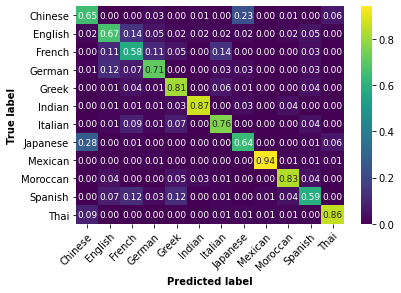

In [114]:
"""
LOGISTIC REGRESSION
"""

#--- necessary packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
random_state = 0

#--- logistic regression
# need to unravel y_train to bring it into 1D vector
log_reg = LogisticRegression(random_state=random_state).fit(X_train, np.ravel(y_train))

#--- training performance 
predict_logreg_train = log_reg.predict(X_train)
train_score = log_reg.score(X_train, y_train)
print("Main classification metrics (training set):\n")
print(classification_report(y_train, predict_logreg_train, target_names=cuisines))
print("Mean accuracy on train data and labels: {:.3f}\n\n".format(train_score))

#--- validation performance
predict_logreg_val = log_reg.predict(X_val)
val_score = log_reg.score(X_val, y_val)
print("Main classification metrics (validation set):\n")
print(classification_report(y_val, predict_logreg_val, target_names=cuisines))
print("Mean accuracy on validation data and labels: {:.3f}".format(val_score))

#--- hyperparameter tuning - regularisation parameter C
#hyp_reg = [0.001, 0.01, 0.1, 0.5, 1.0, 10, 100] # tried these values first
hyp_reg = np.arange(0.8, 2.5, 0.1) # narrowed my choice down 
c_val_score = []
c_train_score = []
for c in range(0, len(hyp_reg), 1):
    # splitting it in two just for readability
    reg_helper = LogisticRegression(random_state=random_state, C=hyp_reg[c], max_iter=1000)
    fit_hyp = reg_helper.fit(X_train, np.ravel(y_train))
    c_train_score.append(fit_hyp.score(X_train, y_train))
    c_val_score.append(fit_hyp.score(X_val, y_val))

#--- Results from Hyperparameter tuning
print('\nClassification performance on validation set for different hyperparameters: \n')
print("{0:<20s}   {1:-^13s}   {2:-^13s}".format('','Validation', 'Training'))
print("{0:<20s} {1:>12s} {2:>13s}".format(
    'Hyperparameter', 'Accuracy\u2191',
    'Accuracy\u2191'))
print("-"*(20+4*13))
for c in range(0, len(hyp_reg), 1):
    print ("{method:<20f}{val_accuracy:>13.3f}{train_accuracy:>13.3f}".format(
        method=hyp_reg[c], 
        val_accuracy=c_val_score[c],
        train_accuracy=c_train_score[c]))   

# lol, default value of 1.0 as regularisation parameter still best

#--- fit logistic regression again on training plus validation data
#use _full data for this
log_reg_full = LogisticRegression(random_state=random_state, max_iter=1000).fit(X_train_full, np.ravel(y_train_full))

#--- should I tune hyperparameters again? on train+val data?

#--- testing performance
predict_logreg_test = log_reg.predict(X_test)
test_score = log_reg_full.score(X_test, y_test)
print("\nMain classification metrics (test set):\n")
print(classification_report(y_test, predict_logreg_test, target_names=cuisines))
print("Mean accuracy on test data and labels: {:.3f}".format(test_score))

#--- confusion matrix for performance on test set
# with true positives and true negatives on diagonal
cm_log_reg = confusion_matrix(y_test, predict_logreg_test, normalize='true')
plot_confusion_matrix(cm_log_reg, class_labels=cuisines)


## Findings:

Pretty bad validation performance on English cuisine. Best val performance on Mexican cuisine.
Hyperparameter tuning on validation set didn't change chosen model, regularisation parameters still default 1.

In [89]:
"""
Code adapted from LAB 4, but focusing on tuning of SVM, leaving Logistic regression in as a comparision

"""

from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.dummy import DummyClassifier
from sklearn.metrics import log_loss

#--- for reproducability
random_state = 10

names = ["Logistic Regression",
         "Linear SVM", "RBF SVM",
         "Linear SVM 0.01", "RBF SVM 0.01",
         "Linear SVM 0.1", "RBF SVM 0.1",
         "Linear SVM 0.5", "RBF SVM 0.05",
         "Linear SVM 0.001", "RBF SVM 0.001"]
classifiers = [
    LogisticRegression(max_iter=1000),
    SVC(kernel="linear", probability=True, random_state=random_state),
    SVC(kernel='rbf', probability=True, random_state=random_state),
    SVC(kernel="linear", probability=True, random_state=random_state, C=0.01),
    SVC(kernel='rbf', probability=True, random_state=random_state, C=0.01),
    SVC(kernel="linear", probability=True, random_state=random_state, C=0.1),
    SVC(kernel='rbf', probability=True, random_state=random_state, C=0.1),
    SVC(kernel="linear", probability=True, random_state=random_state, C=0.5),
    SVC(kernel='rbf', probability=True, random_state=random_state, C=0.05),
    SVC(kernel="linear", probability=True, random_state=random_state, C=0.001),
    SVC(kernel='rbf', probability=True, random_state=random_state, C=0.001)]

# Training 
ca_train_score = {}  # Classification accuracy
ce_train_score = {}  # Cross-entropy

# Validation
ca_val_score = {} 
ce_val_score = {}

for name, clf in zip(names, classifiers):
    clf.fit(X_train, np.ravel(y_train))
    
    ca_train_score[name] = clf.score(X_train, np.ravel(y_train))
    ce_train_score[name] = 0#log_loss(y_train, clf.predict(X_train))
    
    ca_val_score[name] = clf.score(X_val, np.ravel(y_val))
    ce_val_score[name] = 0#log_loss(y_val, clf.predict(X_val))
    print(name, ca_val_score[name])

#----------

print('Classification performance on validation set: \n')
print("{0:<20s}   {1:-^25s}   {2:-^21s}".format('','Validation', 'Training'))
print("{0:<20s}{1:>13s}{2:>13s}{3:>13s}{4:>13s}".format(
    'Method', 'Accuracy\u2191', 'Log-loss\u2193',
    'Accuracy\u2191', 'Log-loss\u2193'))
print("-"*(20+4*13))
for clf in names:
    print ("{method:<20s}{val_accuracy:>13.3f}{val_logloss:>13.3f}{train_accuracy:>13.3f}{train_logloss:>13.3f}".format(
        method=clf, val_accuracy=ca_val_score[clf], val_logloss=ce_val_score[clf],
        train_accuracy=ca_train_score[clf], train_logloss=ce_train_score[clf]))

Logistic Regression 0.7756788665879575
Linear SVM 0.7390791027154664
RBF SVM 0.7638724911452184
Linear SVM 0.01 0.6942148760330579
RBF SVM 0.01 0.06611570247933884
Linear SVM 0.1 0.7449822904368358
RBF SVM 0.1 0.6481700118063755
Linear SVM 0.5 0.7532467532467533
RBF SVM 0.05 0.35182998819362454
Linear SVM 0.001 0.07083825265643448
RBF SVM 0.001 0.06611570247933884
Classification performance on validation set: 

                       -------Validation--------   ------Training-------
Method                  Accuracy↑    Log-loss↓    Accuracy↑    Log-loss↓
------------------------------------------------------------------------
Logistic Regression         0.776        0.000        0.918        0.000
Linear SVM                  0.739        0.000        0.959        0.000
RBF SVM                     0.764        0.000        0.937        0.000
Linear SVM 0.01             0.694        0.000        0.719        0.000
RBF SVM 0.01                0.066        0.000        0.090        0.000
L

How about adding more features? 

In the ingredient list there are several ingredients that have one main ingredient. E.g. acorn squash, winter squash, yellow squash are just different types of squash.

My idea now is to ADD features such that a recipe with ingredients acorn squash and cheddar cheese will have four features for these two ingredients, nameley acorn, squash, cheddar and cheese.

For this task I will create a new design matrix with the additional features one hot encoded. 

Once I have the new matrix, I will check how performance changes when discarding the n-least frequently used ingredients. 

Why am I doing this? Hoping to improve performance for logistic regression. 


In [460]:
#----- MAY NOT NEED THIS AFTER ALL
#--- make copy of ing_headline to store all single words    
all_ing = ing_headline.copy()

#--- split ingredients into single words
for i in range(0, len(all_ing), 1):
    all_ing[i] = all_ing[i].split(" ")

#--- the following outputs a list indicating how often a
#--- specific word of the ingredient appears in other ingredients
ing_list = []
for i in range(0, len(all_ing), 1):
    ing_num = []
    for ing in range(0, len(all_ing[i])):
        #print(len(all_ing[i]))
        ing_num.append(sum(all_ing[i][ing] in s for s in all_ing)) 
        #print(ing_num)
    ing_list.append(ing_num)


In [459]:
#more_features = dataset_X.copy(deep=True)

#txt_mat = open("recipes-mallet.txt", "r")
#for line in txt_mat:
 #   field = line.split(",")

#dataset_X

In [519]:
#--- THIS IS THE MOST IMPORTANT PART
import pandas as pd
#--- converting recipes to strings
str_ing = []
for i in range(0, dataset_X.shape[0], 1):
    # indices of 1's in a row/recipe
    ing_list = []
    helper = dataset_X.iloc[i].to_numpy().nonzero()
    for i in range(0, len(helper[0]), 1):
        ing_list.append(ing_headline[helper[0][i]])
    # str_ing, is list of lists with ingredients per recipe
    str_ing.append(ing_list)


#--- now splitting every recipe
#str_ing_copy = str_ing.copy()
for i in range(0, len(str_ing), 1):
    for j in range(0, len(str_ing[i])):
        if(len(str_ing[i][j].split(" ")) > 1):
            #print(str_ing_copy[i][j].split(" "))
            to_append = str_ing[i][j].split(" ")
            for k in range(0, len(str_ing[i][j].split(" ")), 1):
                str_ing[i].append(str_ing[i][j].split(" ")[k])

from sklearn.feature_extraction import DictVectorizer
#--- create list of dictionarys to convert recipes again to one hot encoding
dict_list = []
for i in range(0, len(str_ing), 1):
    dicts = {}
    # key is ingredient, value always 1
    for key in str_ing[i]:
        dicts[key] = 1
    dict_list.append(dicts)

#--- finally one hot encoding
v = DictVectorizer(sparse=False)
new_matrix = v.fit_transform(dict_list)

#feature_names = v.get_feature_names()
#--- converting into data frame
#new_matrix = pd.DataFrame(new_matrix, columns=feature_names)
#print(new_matrix.sum())
#print(dataset_X.sum())

#--- can do this later for hyp tuning
feature_freq = new_matrix.sum(axis=0)
hyp_par = 100
new_matrix[:, feature_freq > hyp_par].shape
#2600 only 1 ingredient excluded
#100 exclude 136 ingredients

#--- should I do EDA again? with new design matrix?


(4236, 136)

In [625]:
new_matrix.shape

(4236, 1063)

In [589]:
"""
LOGISTIC REGRESSION REPEAT WITH NEW DESIGN MATRIX
"""

#--- want same train, val, test split as before
new_X_train = new_matrix[y_train.index,:]
new_X_val = new_matrix[y_val.index, :]
new_X_test = new_matrix[y_test.index, :]
new_X_full_train = new_matrix[y_train_full.index, :]

#--- necessary packages
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
random_state = 0

#--- logistic regression
# need to unravel y_train to bring it into 1D vector
log_reg = LogisticRegression(random_state=random_state, max_iter=1000).fit(new_X_train, np.ravel(y_train))

#--- training performance 
predict_logreg_train = log_reg.predict(new_X_train)
train_score = log_reg.score(new_X_train, y_train)
print("Main classification metrics (training set):\n")
print(classification_report(y_train, predict_logreg_train, target_names=cuisines))
print("Mean accuracy on train data and labels: {:.3f}\n\n".format(train_score))

#--- validation performance
predict_logreg_val = log_reg.predict(new_X_val)
val_score = log_reg.score(new_X_val, y_val)
print("Main classification metrics (validation set):\n")
print(classification_report(y_val, predict_logreg_val, target_names=cuisines))
print("Mean accuracy on validation data and labels: {:.3f}".format(val_score))

#--- 1. hyperparameter tuning - number of ingredients to disregard
#--- REMOVING INGREDIENTS THAT APPEAR VERY SELDOM
hyp_par = np.arange(1, 50, 1)
c_val_score = []
c_train_score = []

feature_freq_train = new_X_train.sum(axis=0)

reg_helper = LogisticRegression(random_state=random_state, max_iter=1000)
for hyp in hyp_par:
    hyp_matrix = new_X_train[:, feature_freq_train > hyp]
    hyp_matrix_val = new_X_val[:, feature_freq_train > hyp]
    fit_hyp = reg_helper.fit(hyp_matrix, np.ravel(y_train))
    c_train_score.append(fit_hyp.score(hyp_matrix, y_train))
    c_val_score.append(fit_hyp.score(hyp_matrix_val, y_val))

print('\nClassification performance on validation set for different hyperparameters: \n(REMOVING LEAST COMMON INGREDIENTS)\n\n Hyperparameter h = remove h least frequent ingredients\n')
print("{0:<20s}   {1:-^13s}   {2:-^13s}".format('','Validation', 'Training'))
print("{0:<20s} {1:>12s} {2:>13s}".format(
    'Hyperparameter', 'Accuracy\u2191',
    'Accuracy\u2191'))
print("-"*(20+4*13))
for c in hyp_par:
    print ("{method:<20f}{val_accuracy:>13.3f}{train_accuracy:>13.3f}".format(
        method=hyp_par[c-1],
        val_accuracy=c_val_score[c-1],
        train_accuracy=c_train_score[c-1])) 


#--- 2. hyperparameter tuning - number of ingredients to disregard
#--- REMOVING INGREDIENTS THAT APPEAR VERY OFTEN
c_val_score = []
c_train_score = []

reg_helper = LogisticRegression(random_state=random_state, max_iter=1000)

HYP = 50 # how many of the max to disregard
hyp_matrix = new_X_train.copy()
hyp_matrix_val = new_X_val.copy()
drop_list = []
for hyp_par2 in range(1, HYP+1, 1):
    idx_max = hyp_matrix.sum(axis=0).argmax()
    drop_list.append(idx_max)
    hyp_matrix = np.delete(hyp_matrix, idx_max, axis=1)
    hyp_matrix_val = np.delete(hyp_matrix_val, idx_max, axis=1)
    fit_hyp = reg_helper.fit(hyp_matrix, np.ravel(y_train))
    c_train_score.append(fit_hyp.score(hyp_matrix, y_train))
    c_val_score.append(fit_hyp.score(hyp_matrix_val, y_val))

print('\nClassification performance on validation set for different hyperparameters: \n (REMOVING MOST COMMON INGREDIENTS)\n\n Hyperparameter h = remove h most frequent ingredients\n')
print("{0:<20s}   {1:-^13s}   {2:-^13s}".format('','Validation', 'Training'))
print("{0:<20s} {1:>12s} {2:>13s}".format(
    'Hyperparameter', 'Accuracy\u2191',
    'Accuracy\u2191'))
print("-"*(20+4*13))
hyp_par2 = range(1, HYP+1, 1)
for c in range(0, len(c_train_score), 1):
    print ("{method:<20f}{val_accuracy:>13.3f}{train_accuracy:>13.3f}".format(
        method=hyp_par2[c], 
        val_accuracy=c_val_score[c],
        train_accuracy=c_train_score[c])) 



Main classification metrics (training set):

              precision    recall  f1-score   support

     Chinese       0.92      0.94      0.93       207
     English       0.89      0.89      0.89       209
      French       0.88      0.89      0.89       219
      German       0.96      0.92      0.94       208
       Greek       0.96      0.93      0.95       213
      Indian       0.98      0.98      0.98       203
     Italian       0.90      0.95      0.93       215
    Japanese       0.93      0.94      0.94       212
     Mexican       0.97      0.99      0.98       206
    Moroccan       0.96      0.98      0.97       221
     Spanish       0.91      0.90      0.90       220
        Thai       0.98      0.95      0.96       208

    accuracy                           0.94      2541
   macro avg       0.94      0.94      0.94      2541
weighted avg       0.94      0.94      0.94      2541

Mean accuracy on train data and labels: 0.936


Main classification metrics (validation 

'\nlog_reg_full = LogisticRegression(random_state=random_state, max_iter=1000).fit(new_X_full_train, np.ravel(y_train_full))\n\n#--- should I tune hyperparameters again? on train+val data?\n\n#--- testing performance\npredict_logreg_test = log_reg.predict(new_X_test)\ntest_score = log_reg_full.score(new_X_test, y_test)\nprint("\nMain classification metrics (test set):\n")\nprint(classification_report(y_test, predict_logreg_test, target_names=cuisines))\nprint("Mean accuracy on validation data and labels: {:.3f}".format(test_score))\n'

 
Result: Removing the 8 most frequent ingredients results in a validation accuracy of 0.774 and a training accuracy of 0.931. This is best performance among all scenarios.

Before we had validation accuracy of 0.776 and a training accuracy of 0.918.

In [612]:
#--- delete the 8 most frequent ingredients and tune regularisation hyperparameter c
#hyp_reg = [0.001, 0.01, 0.1, 0.5, 0.8, 0.8, 1.0, 10, 100]
#hyp_reg = np.arange(0.5, 1.5, 0.01) # narrowed my choice down 
hyp_reg = np.arange(0.5, 1.5, 0.1)

random_state = 0

c_val_score = []
c_train_score = []

#--- deleting
drop_list = []
X_train_8_deleted = new_X_train.copy()
X_val_8_deleted = new_X_val.copy()
X_train_full_8_deleted = new_X_full_train.copy()
for i in range(1, 8+1, 1):
    idx_max = X_train_8_deleted.sum(axis=0).argmax()
    drop_list.append(idx_max)
    X_train_8_deleted = np.delete(X_train_8_deleted, idx_max, axis=1)
    X_val_8_deleted = np.delete(X_val_8_deleted, idx_max, axis=1)
    X_train_full_8_deleted = np.delete(X_train_full_8_deleted, idx_max, axis=1)

#--- tuning
for c in range(0, len(hyp_reg), 1):
    # splitting it in two just for readability
    reg_helper = LogisticRegression(random_state=random_state, C=hyp_reg[c], max_iter=1000)
    fit_hyp = reg_helper.fit(X_train_8_deleted, np.ravel(y_train))
    c_train_score.append(fit_hyp.score(X_train_8_deleted, y_train))
    c_val_score.append(fit_hyp.score(X_val_8_deleted, y_val))

#--- Results from Hyperparameter tuning
print('\nClassification performance on validation set for different hyperparameters: \n \n (Hyperparameter = Regularisation constant)\n\n')
print("{0:<20s}   {1:-^13s}   {2:-^13s}".format('','Validation', 'Training'))
print("{0:<20s} {1:>12s} {2:>13s}".format(
    'Hyperparameter', 'Accuracy\u2191',
    'Accuracy\u2191'))
print("-"*(20+4*13))
for c in range(0, len(hyp_reg), 1):
    print ("{method:<20f}{val_accuracy:>13.3f}{train_accuracy:>13.3f}".format(
        method=hyp_reg[c], 
        val_accuracy=c_val_score[c],
        train_accuracy=c_train_score[c]))   




Classification performance on validation set for different hyperparameters: 
 
 (Hyperparameter = Regularisation constant)


                       -Validation--   --Training---
Hyperparameter          Accuracy↑     Accuracy↑
------------------------------------------------------------------------
0.500000                    0.774        0.899
0.510000                    0.776        0.901
0.520000                    0.776        0.902
0.530000                    0.776        0.903
0.540000                    0.776        0.904
0.550000                    0.774        0.904
0.560000                    0.776        0.904
0.570000                    0.776        0.906
0.580000                    0.776        0.907
0.590000                    0.778        0.908
0.600000                    0.778        0.908
0.610000                    0.778        0.910
0.620000                    0.777        0.911
0.630000                    0.777        0.913
0.640000                    0.778        0

Regularisation constants between 0.67 - 0.78 show "highest" performance on validation set, ah no pick simplest model, i.e. the one that regularizes the most which is the constant 0.59.



#-- do not run this

drop_list = []
X_train_8_deleted = new_X_train.copy()
X_val_8_deleted = new_X_val.copy()
X_train_full_8_deleted = new_X_full_train.copy()
X_test_8_deleted = new_X_test.copy()
for i in range(1, 8+1, 1):
    idx_max = X_train_8_deleted.sum(axis=0).argmax()
    drop_list.append(idx_max)
    X_train_8_deleted = np.delete(X_train_8_deleted, idx_max, axis=1)
    X_val_8_deleted = np.delete(X_val_8_deleted, idx_max, axis=1)
    X_train_full_8_deleted = np.delete(X_train_full_8_deleted, idx_max, axis=1)
    X_test_8_deleted = np.delete(X_test_8_deleted, idx_max, axis=1)


Main classification metrics (test set):

              precision    recall  f1-score   support

     Chinese       0.71      0.79      0.75        72
     English       0.67      0.65      0.66        81
      French       0.56      0.61      0.58        64
      German       0.71      0.73      0.72        74
       Greek       0.84      0.79      0.82        73
      Indian       0.92      0.92      0.92        71
     Italian       0.85      0.82      0.83        71
    Japanese       0.71      0.69      0.70        64
     Mexican       0.94      0.89      0.91        70
    Moroccan       0.79      0.87      0.83        61
     Spanish       0.66      0.70      0.68        71
        Thai       0.94      0.79      0.86        76

    accuracy                           0.77       848
   macro avg       0.77      0.77      0.77       848
weighted avg       0.78      0.77      0.77       848

Mean accuracy on test data and labels: 0.770


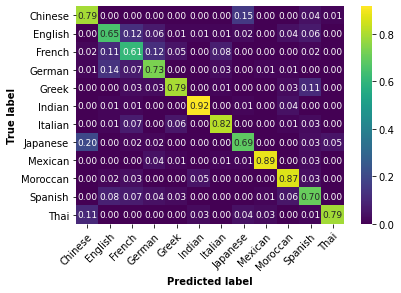

In [620]:
#--- FINALLY, TESTING!

#--- fit logistic regression again on training plus validation data
#use _full data for this (but the one with 8 deleted )

log_reg_full = LogisticRegression(random_state=random_state, max_iter=1000, C=0.59).fit(X_train_full_8_deleted, np.ravel(y_train_full))

#--- should I tune hyperparameters again? on train+val data?

#--- testing performance

predict_logreg_test = log_reg_full.predict(X_test_8_deleted)
test_score = log_reg_full.score(X_test_8_deleted, y_test)
print("\nMain classification metrics (test set):\n")
print(classification_report(y_test, predict_logreg_test, target_names=cuisines))
print("Mean accuracy on test data and labels: {:.3f}".format(test_score))

#--- confusion matrix for performance on test set
# with true positives and true negatives on diagonal
cm_reg = confusion_matrix(y_test, predict_logreg_test, normalize='true')
plot_confusion_matrix(cm_reg, class_labels=cuisines)

Improved very little:

* Before - accuracy on test set was 0.768

* Now - accuracy on test is 0.77

BUT: it is noticable that all true positives are above 0.61 now, before we had for French cuisine 0.58 and for Spanish 0.59. In particular for Spanish cuisine this improved a lot, now 0.7. 

Also want to have a look if I use the new design matrix WITHOUT DELETING any features

In [623]:
"""
LOGISTIC REGRESSION REPEAT WITH NEW DESIGN MATRIX - ROUND 2
"""

#--- logistic regression
# need to unravel y_train to bring it into 1D vector
log_reg = LogisticRegression(random_state=random_state, max_iter=1000).fit(new_X_train, np.ravel(y_train))

#--- training performance 
predict_logreg_train = log_reg.predict(new_X_train)
train_score = log_reg.score(new_X_train, y_train)
print("Main classification metrics (training set):\n")
print(classification_report(y_train, predict_logreg_train, target_names=cuisines))
print("Mean accuracy on train data and labels: {:.3f}\n\n".format(train_score))

#--- validation performance
predict_logreg_val = log_reg.predict(new_X_val)
val_score = log_reg.score(new_X_val, y_val)
print("Main classification metrics (validation set):\n")
print(classification_report(y_val, predict_logreg_val, target_names=cuisines))
print("Mean accuracy on validation data and labels: {:.3f}".format(val_score))


#--- tuning
hyp_reg = np.arange(0.5, 1.5, 0.01)
#hyp_reg = [0.5, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 10, 100]
#hyp_reg = [0.001, 0.01, 0.1, 0.5, 0.8, 1.0, 10, 100]
c_val_score = []
c_train_score = []
for c in range(0, len(hyp_reg), 1):
    # splitting it in two just for readability
    reg_helper = LogisticRegression(random_state=random_state, C=hyp_reg[c], max_iter=1000)
    fit_hyp = reg_helper.fit(new_X_train, np.ravel(y_train))
    c_train_score.append(fit_hyp.score(new_X_train, y_train))
    c_val_score.append(fit_hyp.score(new_X_val, y_val))

#--- Results from Hyperparameter tuning
print('\nClassification performance on validation set for different hyperparameters: \n \n (Hyperparameter = Regularisation constant)\n\n')
print("{0:<20s}   {1:-^13s}   {2:-^13s}".format('','Validation', 'Training'))
print("{0:<20s} {1:>12s} {2:>13s}".format(
    'Hyperparameter', 'Accuracy\u2191',
    'Accuracy\u2191'))
print("-"*(20+4*13))
for c in range(0, len(hyp_reg), 1):
    print ("{method:<20f}{val_accuracy:>13.3f}{train_accuracy:>13.3f}".format(
        method=hyp_reg[c], 
        val_accuracy=c_val_score[c],
        train_accuracy=c_train_score[c]))   

#--- pick 0.63 as a hyperparameter


Main classification metrics (training set):

              precision    recall  f1-score   support

     Chinese       0.92      0.94      0.93       207
     English       0.89      0.89      0.89       209
      French       0.88      0.89      0.89       219
      German       0.96      0.92      0.94       208
       Greek       0.96      0.93      0.95       213
      Indian       0.98      0.98      0.98       203
     Italian       0.90      0.95      0.93       215
    Japanese       0.93      0.94      0.94       212
     Mexican       0.97      0.99      0.98       206
    Moroccan       0.96      0.98      0.97       221
     Spanish       0.91      0.90      0.90       220
        Thai       0.98      0.95      0.96       208

    accuracy                           0.94      2541
   macro avg       0.94      0.94      0.94      2541
weighted avg       0.94      0.94      0.94      2541

Mean accuracy on train data and labels: 0.936


Main classification metrics (validation 


Main classification metrics (test set):

              precision    recall  f1-score   support

     Chinese       0.75      0.85      0.80        72
     English       0.65      0.65      0.65        81
      French       0.57      0.66      0.61        64
      German       0.78      0.70      0.74        74
       Greek       0.86      0.78      0.82        73
      Indian       0.90      0.93      0.92        71
     Italian       0.86      0.80      0.83        71
    Japanese       0.73      0.69      0.71        64
     Mexican       0.94      0.90      0.92        70
    Moroccan       0.79      0.87      0.83        61
     Spanish       0.65      0.75      0.70        71
        Thai       0.92      0.79      0.85        76

    accuracy                           0.78       848
   macro avg       0.79      0.78      0.78       848
weighted avg       0.79      0.78      0.78       848

Mean accuracy on test data and labels: 0.779


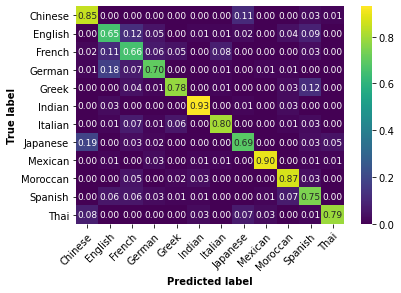

In [624]:
#--- fit logistic regression again on training plus validation data
#use _full data for this 

log_reg_full = LogisticRegression(random_state=random_state, max_iter=1000, C=0.63).fit(new_X_full_train, np.ravel(y_train_full))

#--- should I tune hyperparameters again? on train+val data?

#--- testing performance

predict_logreg_test = log_reg_full.predict(new_X_test)
test_score = log_reg_full.score(new_X_test, y_test)
print("\nMain classification metrics (test set):\n")
print(classification_report(y_test, predict_logreg_test, target_names=cuisines))
print("Mean accuracy on test data and labels: {:.3f}".format(test_score))

#--- confusion matrix for performance on test set
# with true positives and true negatives on diagonal
cm_reg = confusion_matrix(y_test, predict_logreg_test, normalize='true')
plot_confusion_matrix(cm_reg, class_labels=cuisines)